In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from matplotlib import pyplot as plt
# Import supplementary visualization code visuals.py

df= pd.read_csv(r"C:\Users\gsubh\Downloads\data.csv")
df1= pd.read_csv(r"C:\Users\gsubh\Downloads\data.csv")


In [2]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [3]:
df1['income']=df1['income'].replace(' <=50K',0)
df1['income']=df1['income'].replace(' >50K',1)
display(df1)

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


###  We are changing the values of the income to numerical values, inorder to get the correlation with the other features 

In [4]:
correlationMatrix= df1.corr()
print(correlationMatrix)

                     age    fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043195      0.000432     -0.010252   
education-num   0.036527 -0.043195       1.000000      0.122630      0.079923   
capital-gain    0.077674  0.000432       0.122630      1.000000     -0.031615   
capital-loss    0.057775 -0.010252       0.079923     -0.031615      1.000000   
hours-per-week  0.068756 -0.018768       0.148123      0.078409      0.054256   
income          0.234037 -0.009463       0.335154      0.223329      0.150526   

                hours-per-week    income  
age                   0.068756  0.234037  
fnlwgt               -0.018768 -0.009463  
education-num         0.148123  0.335154  
capital-gain          0.078409  0.223329  
capital-loss          0.054256  0.150526  
hours-per-week        1.000000  0.229689  
income                0.229689  1.000000  


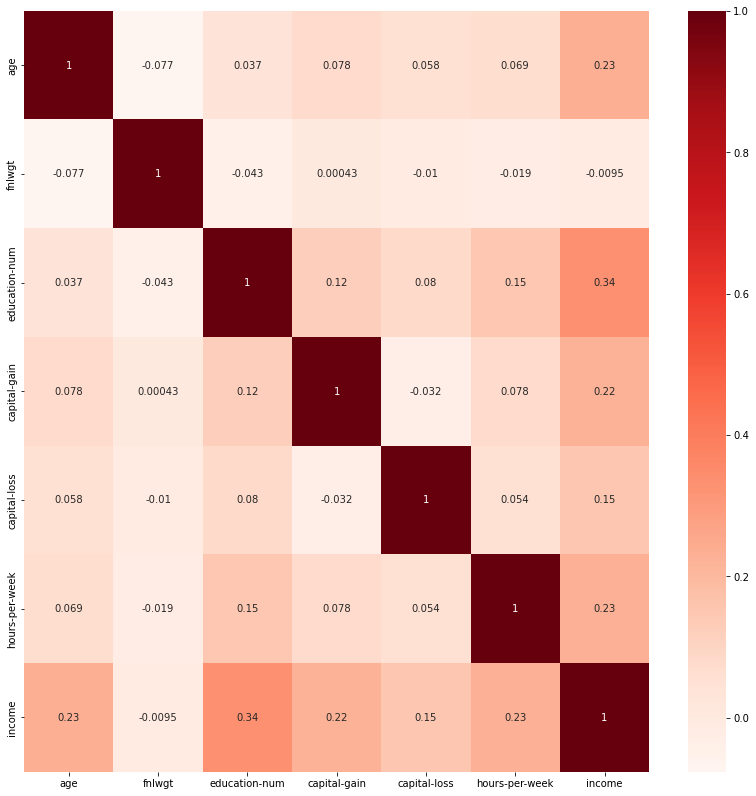

In [5]:

import seaborn as sns
plt.figure(figsize=(14,14))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


By observing the correlation map, we can that infer that income feature is not heavily/ fully dependent on any single feature. Also, fnlwgt is giving us the negative correlation with income. So, we might drop this columns going further.

# EDA

Number of Null Rows in Age Column is  0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

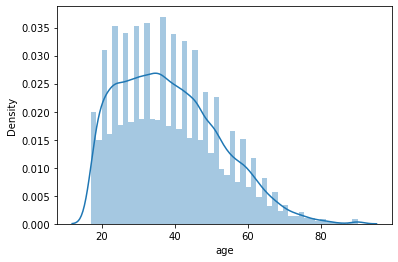

In [6]:
print("Number of Null Rows in Age Column is ", df1['age'].isna().sum())
sns.distplot(df['age'])

Our data has a right skewness, with the majority of the ages lying between 20 and 50. As people get older, the number continues to decrease. We also see that the age field does not include any null values.

## Workclass column

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workclass', ylabel='count'>

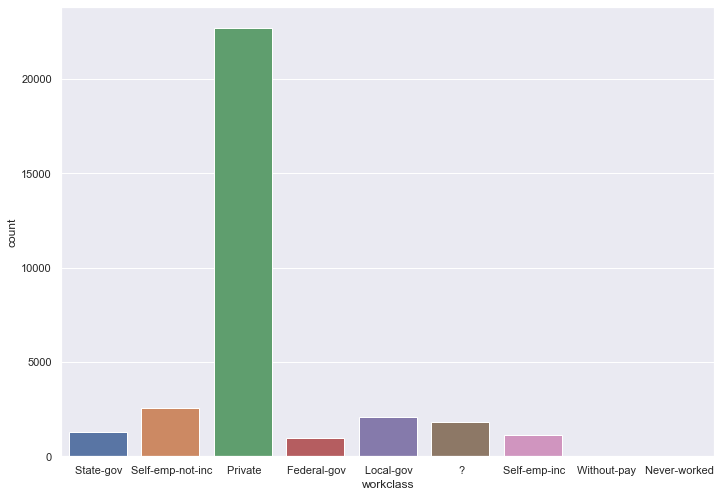

In [7]:
df1['workclass'].value_counts()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(df1['workclass'])

When we look at the unique values for workclass, we notice that there are seven different sorts of values, as well as some missing values denoted by a '?'. Null values account for 1836, or around 5% of the data.

In [8]:
c=0
for index,row in df1.iterrows():     
    if row['workclass'].strip()=="?":
        #display(row)
        c+=1



We see that the majority of people work in the 'Private' sector.
We also notice something interesting here: the values that are missing 'Workclass' are also missing 'Occupation'!

## Education column

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education_level, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education_level', ylabel='count'>

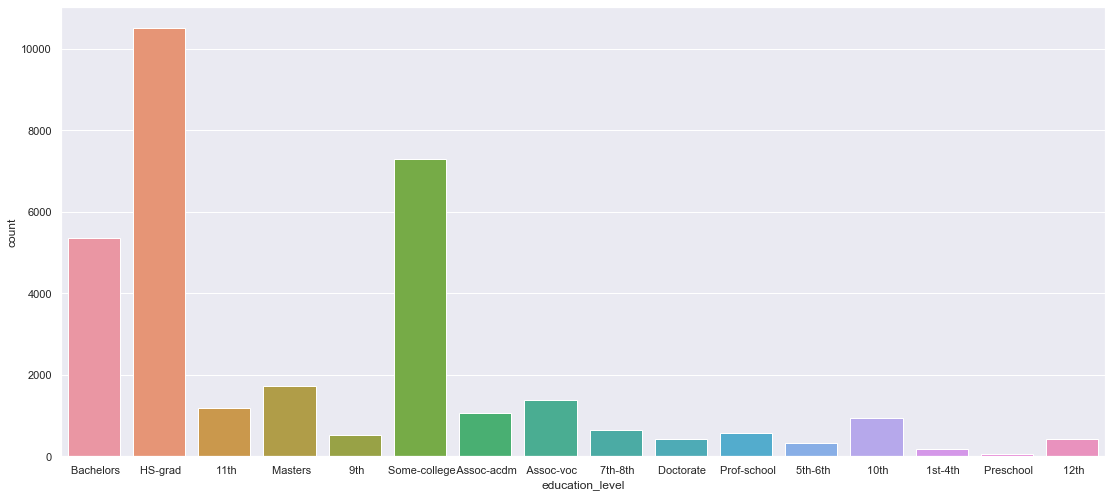

In [9]:
print(df1['education_level'].value_counts())
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.countplot(df1['education_level'])


There are 16 different categories in the 'Education' column. The majority of these categories fall within the 'School' category (different classes are divided into multiple categories). There are no missing values in this column, and the majority of persons have a 'HS-grad' education level, followed by 'Some-college' and 'Bachelors'.

# Visualizing the features against Income Column 

## Race vs Income

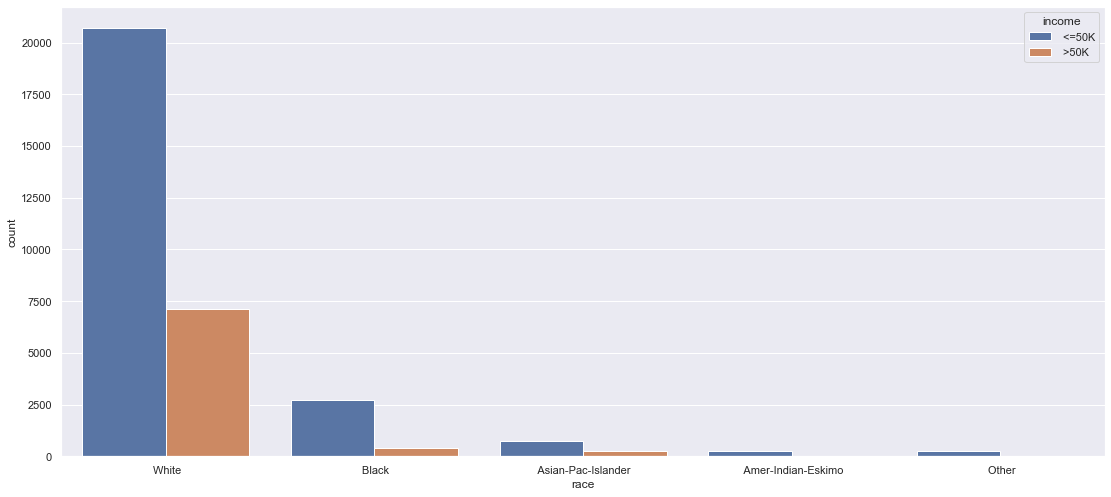

In [10]:
import matplotlib.pyplot as plt
 

# count plot on two categorical variable
sns.countplot(x ='race', hue = "income", data = df)
 
# Show the plot
plt.show()

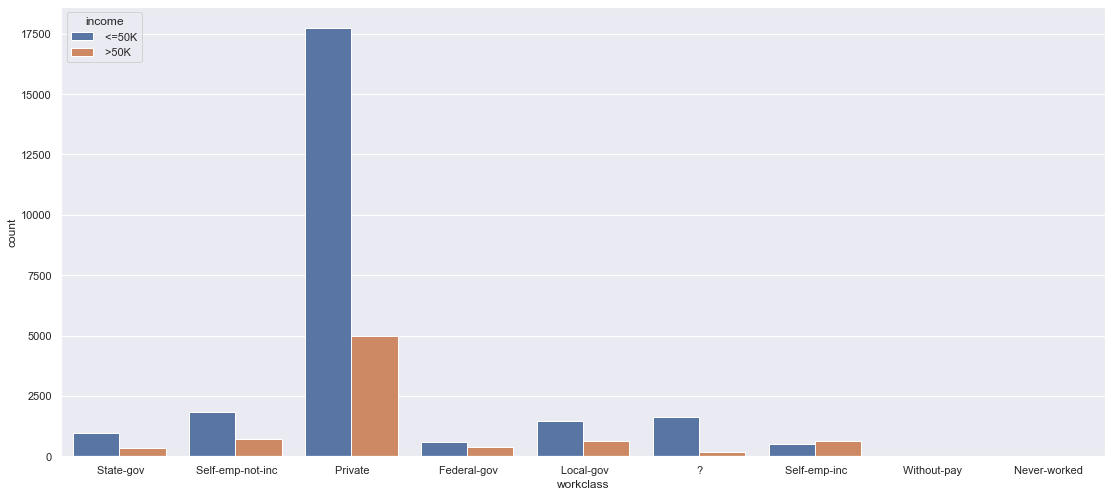

In [11]:
sns.countplot(x ='workclass', hue = "income", data = df)
# Show the plot
plt.show()

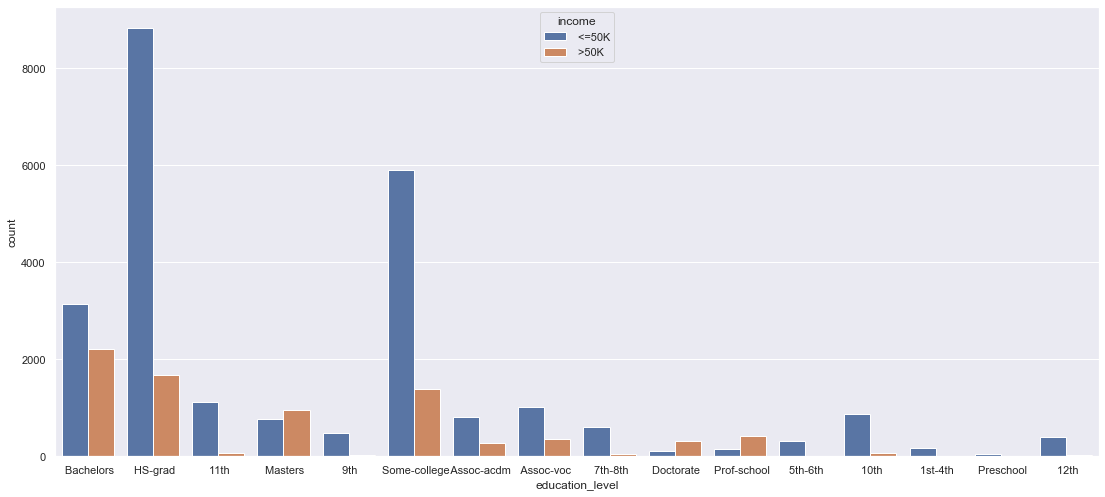

In [12]:
sns.countplot(x ='education_level', hue = "income", data = df)
# Show the plot
plt.show()

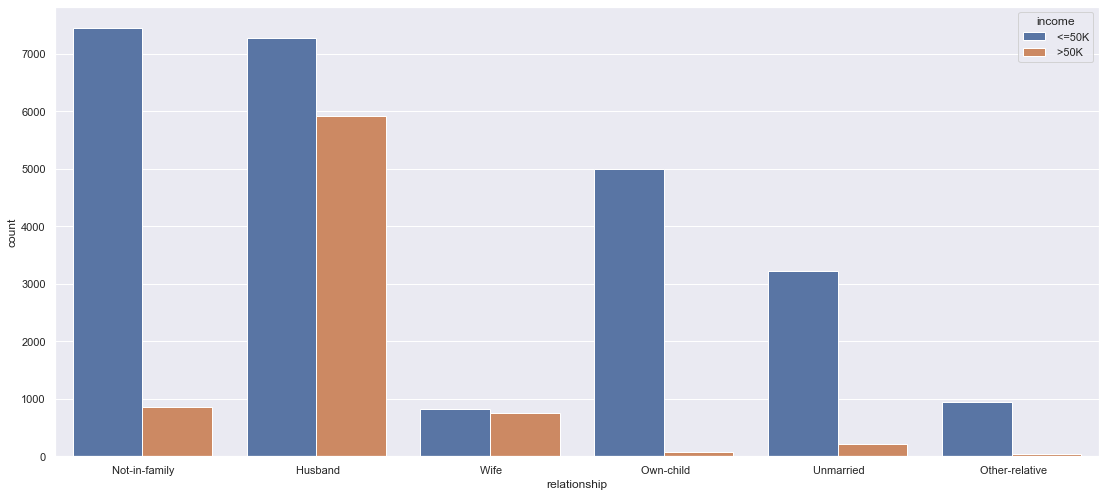

In [13]:
sns.countplot(x ='relationship', hue = "income", data = df)
# Show the plot
plt.show()

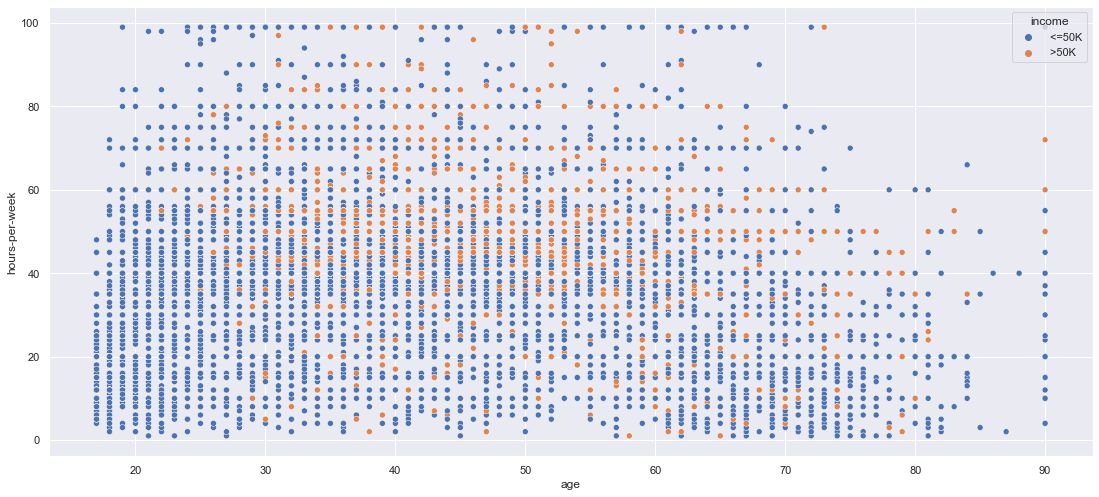

In [14]:
sns.scatterplot(x="age",y="hours-per-week",hue="income",data=df)
plt.show()

# Analysis from Above Plots

- If a person's race is 'White'/'Asian-pac-islander,' he or she has a good likelihood of earning more than 50K(Dollars).
- Males are more likely than females to earn more than 50K(Dollars).
- Number of People earning more than 50K is high in private sector when compared to Others. If Workclass is 'Self-emp-inc,' the percentage of those earning more than 50K(Dollars) is greater.
- People with a 'Masters/Doctorate/Prof-school' education have a larger ratio of >50K earning than those with a '=50K' education. The ratio of =50K: >50K for bachelor's degrees is roughly 10:7.
- If the relationship status is 'Husband/Wife,' the odds of earning more than 50K(Dollars) are considerable.
- Based on the scatterplot of age, hours per week, and income, we can see that to make more than 50K(Dollars), a person must be at least 30 years old or he/she should work at least 60 hours per week.

# Cleaning Data

We have the missing Values in our data set for the columns workclass, occupation and native_country. So Instead of removing the rows with missing values we are going to replace them, with the mean/mode. Hence, we replace ‘?’ is ‘Workclass’ column by ‘Private’, ‘Occupation’ column by ‘Prof-speciality’ and ‘Native_country’ by ‘United_States’.

In [15]:
df1['workclass']=df1['workclass'].replace(' ?',' Private')
df1['occupation']=df1['occupation'].replace(' ?',' Prof-specialty')
df1['native-country']=df1['native-country'].replace(' ?',' United-States')


# Logically Combining the data to reduce number of Categories in Features

In [16]:
print(df1['workclass'].value_counts())
print()
print(df1['education_level'].value_counts())

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education_level, dtype: int64


We can keep Never-worked and Without-pay into one category. Also Group State-gov, Local-gov into Government. Add Self-emp-not-inc into ‘Private’ category 
We combine all the columns relevant to schools in ‘School’ category, Lets keep ‘Doctorate’ and ‘Prof school’ in a single category ‘Doctorate’, ‘Assoc-acdm’ and ‘Assoc-voc’ in one category ‘Assoc’, and ‘HS-Grad’ and ‘Some-college’ in one category ‘College’.

In [17]:
df1['workclass']=df1['workclass'].replace(' Never-worked',' Without-pay')
df1['workclass']=df1['workclass'].replace(' State-gov',' Government')
df1['workclass']=df1['workclass'].replace(' Local-gov',' Government')
df1['workclass']=df1['workclass'].replace(' Self-emp-not-inc',' Private')
print(df1['workclass'].value_counts())

 Private         27073
 Government       3391
 Self-emp-inc     1116
 Federal-gov       960
 Without-pay        21
Name: workclass, dtype: int64


In [18]:
df1['education_level']=df1['education_level'].replace(' 1st-4th',' School')
df1['education_level']=df1['education_level'].replace(' 5th-6th',' School')
df1['education_level']=df1['education_level'].replace(' 7th-8th',' School')
df1['education_level']=df1['education_level'].replace(' 9th',' School')
df1['education_level']=df1['education_level'].replace(' 10th',' School')
df1['education_level']=df1['education_level'].replace(' 11th',' School')
df1['education_level']=df1['education_level'].replace(' 12th',' School')
df1['education_level']=df1['education_level'].replace(' Preschool',' School')
df1['education_level']=df1['education_level'].replace(' HS-grad',' College')
df1['education_level']=df1['education_level'].replace(' Some-college',' College')
df1['education_level']=df1['education_level'].replace(' Prof-school',' Doctorate')
df1['education_level']=df1['education_level'].replace(' Assoc-voc',' Associate')
df1['education_level']=df1['education_level'].replace(' Assoc-acdm',' Associate')
print(df1['education_level'].value_counts())

 College      17792
 Bachelors     5355
 School        4253
 Associate     2449
 Masters       1723
 Doctorate      989
Name: education_level, dtype: int64


In [19]:
df1['marital-status']=df1['marital-status'].replace(' Married-spouse-absent',' No spouse')
df1['marital-status']=df1['marital-status'].replace(' Separated',' No spouse')
df1['marital-status']=df1['marital-status'].replace(' Widowed',' No spouse')
df1['marital-status']=df1['marital-status'].replace(' Divorced',' No spouse')
df1['marital-status']=df1['marital-status'].replace(' Married-AF-spouse',' No spouse')

print(df1['marital-status'].value_counts())

 Married-civ-spouse    14976
 Never-married         10683
 No spouse              6902
Name: marital-status, dtype: int64


In [20]:
df1['relationship']=df1['relationship'].replace(' Own-child',' Other')
df1['relationship']=df1['relationship'].replace(' Unmarried',' Other')
df1['relationship']=df1['relationship'].replace(' Not-in-family',' Other')
df1['relationship']=df1['relationship'].replace(' Other-relative',' Other')
print(df1['relationship'].value_counts())

 Other      17800
 Husband    13193
 Wife        1568
Name: relationship, dtype: int64


In [21]:
df1['race']=df1['race'].replace(' Amer-Indian-Eskimo',' Other')
print(df1['race'].value_counts())

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Other                   582
Name: race, dtype: int64


# Encoding The Data

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df1.drop(columns=['fnlwgt'])
df1.columns


Index(['age', 'workclass', 'fnlwgt', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [23]:
df1['workclass']=le.fit_transform(df1['workclass'])
df1['education_level']=le.fit_transform(df1['education_level'])
df1['marital-status']=le.fit_transform(df1['marital-status'])
df1['occupation']=le.fit_transform(df1['occupation'])
df1['relationship']=le.fit_transform(df1['relationship'])
df1['race']=le.fit_transform(df1['race'])
df1['sex']=le.fit_transform(df1['sex'])
df1['native-country']=le.fit_transform(df1['native-country'])

In [24]:
X = df1.drop('income', axis = 1) 
Y = df1['income']

In [25]:
X.head()

,age,workclass,fnlwgt,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,1,77516,1,13,1,0,1,3,1,2174,0,40,38
1,50,2,83311,1,13,0,3,0,3,1,0,0,13,38
2,38,2,215646,2,9,2,5,1,3,1,0,0,40,38
3,53,2,234721,5,7,0,5,0,1,1,0,0,40,38
4,28,2,338409,1,13,0,9,2,1,0,0,0,40,4


# Feature Selection

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state = 42)
selector.fit(X, Y)
feature_imp = selector.feature_importances_
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 16.01
1 2.75
2 17.98
3 3.97
4 8.83
5 9.16
6 7.2
7 7.47
8 1.34
9 2.53
10 8.64
11 2.79
12 9.83
13 1.52


In [27]:
X = X.drop(['workclass', 'education_level', 'race', 'sex', 'capital-loss', 'native-country'], axis = 1)

# Scaling Data

In [28]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_x=df1.drop('income',axis='columns')
y=df1['income']
dataset=sc.fit_transform(df1_x)
x=pd.DataFrame(dataset,columns=df1_x.columns)